## Discriminability

## Algorithm

### Description

#### Discriminability measures the overall consistency and differentiability of observations.

- If we have the same subject and the same conditions, the measurements via two trials should be more similar in comparison to a different subject or a different condition.

- Let sample i contain physical property V_i. We cannot know the exact value of V_i, therefore our measurements will transport truth from V_i to W_i using the function f\phi

- The output of f becomes the "raw" observation data w_i.

- Then this data has noise. We will preprocess it from wi to xi using the function g. As we can see, the function becomes x_i = g\psi(f\phi(v_i)).

- Let i be subjects and t be trials.

#### Our Assumption is that the distance between xi,t and xi,t` will be smaller in comparison to xi',t``. This is just a mathematical way of stating that the same subjects under the same conditions hopefully will have the most similar result.

- Then we let delta be our metric that computes the distance between two measurements.

 Discriminability, D(\psi) = P( )
- it is the probability that within subjet distance is smaller than across subject distance.

- Recall that the initial deviation (measurement) is out of our control since we receive measured data and don't measure the data ourselves, but what is in our control is the preprocessing step. Therefore, we would like to maximize the discriminability that come out of preprocessing.

### When does it work well?

- The effectiveness of discriminability bases on the metric that one uses to evaluate the experiment. Different types of data require a different metric. Pythagorean distance, correlation, and coherence are some examples of metrics used.
- Ryan will demonstrate which metric to use in which condition.
- A good time to use discriminability is when we have a clear thing that we want to "discriminate" against. We want to see how different inter-subject data is or inter-trial data is. 

### Pseudocode

![alt text](http://pasteboard.co/xYaqxU0oG.png)
https://www.overleaf.com/6854142skxwmyxfjwms#/23377679/

### Simulation

In [1]:
import numpy as np
import pandas as pd
from py_disc.disc import D, naive_D

In [2]:
d = np.array([[2], [4], [5], [5]])
subjects = np.array(['A', 'A', 'B', 'B'])
df = pd.DataFrame(data = d, index = subjects)
df.index.name = 'Subject'
df.columns = ['Value']
print 'Simple Experiment Data'
df

Simple Experiment Data


,Value
Subject,
A,2
A,4
B,5
B,5


We let our metric be the absolute distance between two points.  
**\delta = |x-y|**  
We can see by inspection, this data has high discriminability.
The discriminability is 0.75 by hand calculation. 

In [3]:
print 'Optimized Algorithm'
%timeit disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
print info
print
print 'Discriminibility:', disc

Optimized Algorithm
1000 loops, best of 3: 687 µs per loop
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                      1.0
1       A     1           0                      0.0
2       B     0           1                      1.0
3       B     1           0                      1.0

Discriminibility: 0.75


In [4]:
d = np.array([[4], [8], [5], [10]])
subjects = np.array(['A', 'A', 'B', 'B'])
df = pd.DataFrame(data = d, index = subjects)
df.index.name = 'Subject'
df.columns = ['Value']
print 'Simple Experiment Data'
df

Simple Experiment Data


,Value
Subject,
A,4
A,8
B,5
B,10


Within subject, this data has a lot of variations. We can see that it is going to be bad.
By calculations, the discriminability is 0.25.

In [5]:
print 'Optimized Algorithm'
%timeit disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
disc, info = D(d, subjects, lambda x, y: np.abs(x[0] - y[0]))
print info
print
print 'Discriminibility:', disc

Optimized Algorithm
1000 loops, best of 3: 684 µs per loop
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                      0.5
1       A     1           0                      0.0
2       B     0           1                      0.0
3       B     1           0                      0.5

Discriminibility: 0.25


** On 2D distances **

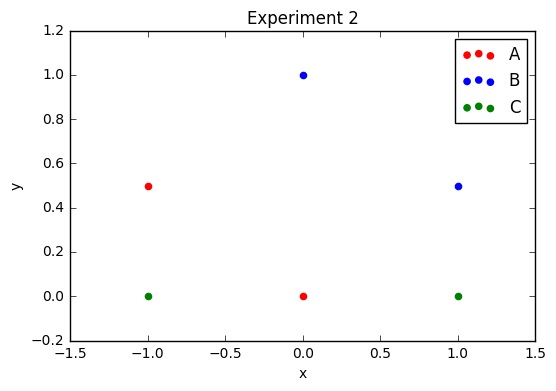

In [6]:
import matplotlib.pyplot as plt
d = np.array([[-1, 0.5], [0, 0], [1, .5], [0, 1], [-1, 0], [1, 0]])
subjects = np.array(['A', 'A', 'B', 'B', 'C', 'C'])
plt.scatter(d[subjects == 'A'][:, 0], d[subjects == 'A'][:, 1],
            color = 'red', label = 'A')
plt.scatter(d[subjects == 'B'][:, 0], d[subjects == 'B'][:, 1],
            color = 'blue', label = 'B')
plt.scatter(d[subjects == 'C'][:, 0], d[subjects == 'C'][:, 1],
            color = 'green', label = 'C')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Experiment 2')
plt.legend()
plt.show()

In [7]:
print 'Optimized Algorithm'
%timeit disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
print 'Discriminibility:', disc
print info

Optimized Algorithm
1000 loops, best of 3: 1.1 ms per loop
Discriminibility: 0.333333333333
  Subject Trial Trial_Prime Partial Discriminibility
0       A     0           1                      0.5
1       A     1           0                      0.0
2       B     0           1                      0.5
3       B     1           0                      0.5
4       C     0           1                     0.25
5       C     1           0                     0.25


### On Data of Different Statistical Distributions
#### 1. Normal Distribution

100 loops, best of 3: 12.2 ms per loop

0.8


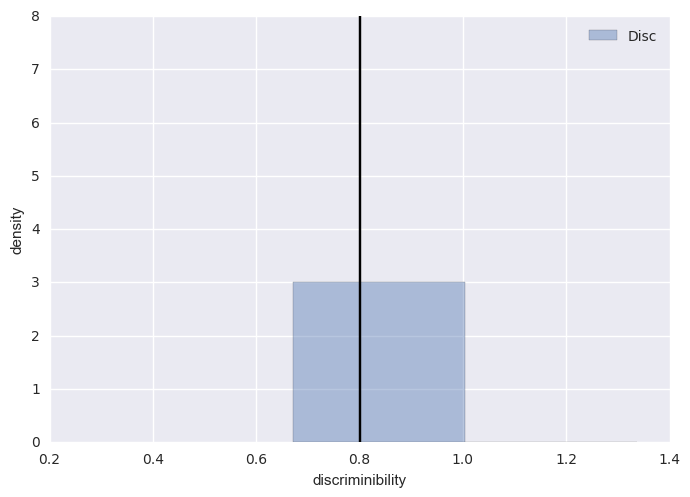

0.837222222222
    Subject Trial Trial_Prime Partial Discriminibility
0         A     0           1                      0.0
1         A     0           2                      0.2
2         A     0           3                      0.1
3         A     0           4                      0.0
4         A     0           5                      0.0
5         A     0           6                      0.0
6         A     0           7                      0.0
7         A     0           8                      0.0
8         A     0           9                      0.0
9         A     1           0                      0.7
10        A     1           2                      1.0
11        A     1           3                      1.0
12        A     1           4                      1.0
13        A     1           5                      1.0
14        A     1           6                      1.0
15        A     1           7                      1.0
16        A     1           8                     

In [8]:
import seaborn as sns

A = np.random.normal(1,0.5,10)
B = np.random.normal(2,0.3,10)
d = np.hstack([A, B])
subjects = np.array(['A'] * 10 + ['B'] * 10)
%timeit disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
print
C = np.random.normal(1,0.5,10)
ans = np.mean(np.abs(A - C) < np.abs(A - B))
print ans
results = []
for i in range(10):
    d = np.hstack([A,B])
    subjects = np.array(['A'] * 10 + ['B'] * 10)
    disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    results.append(disc)
sns.distplot(results, label='Disc')
plt.vlines(ans, 0, 8)
plt.xlabel('discriminibility')
plt.ylabel('density')
plt.legend()
plt.show()
print disc
print info

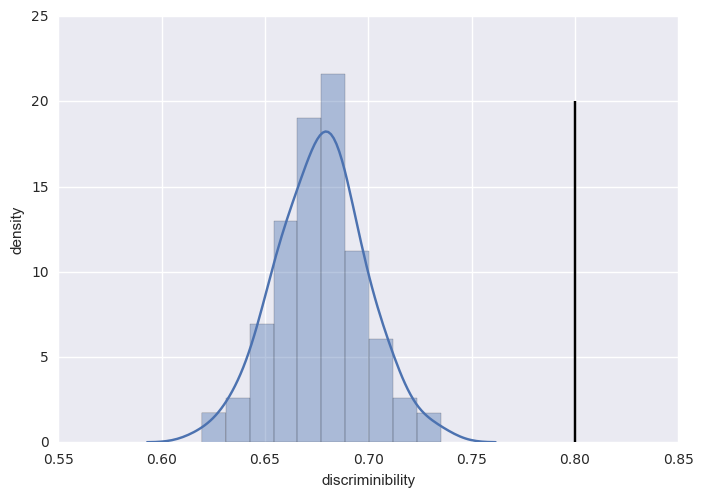

In [9]:
n = 150
results = []
for i in range(100):
    d = np.hstack([np.random.uniform(0, 2, n), np.random.uniform(1, 3, n)])
    subjects = np.array(['A'] * n + ['B'] * n)
    disc, info = D(d, subjects, lambda x, y: np.linalg.norm(x - y))
    results.append(disc)
sns.distplot(results)
plt.vlines(ans, 0, 20)
plt.xlabel('discriminibility')
plt.ylabel('density')
plt.show()
